In [2]:
import json 
import pandas as pd

In [3]:
with open("../data/wikipedia_documents.json") as json_file:
    json_data = json.load(json_file)


In [4]:
df_wiki = pd.DataFrame(json_data)

In [5]:
df = df_wiki.transpose()
df

text corpus_source   url  \
0      이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...         위키피디아  TODO   
1      이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...         위키피디아  TODO   
2      현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...         위키피디아  TODO   
3      아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...         위키피디아  TODO   
4      저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...         위키피디아  TODO   
...                                                  ...           ...   ...   
60608  오키나와 현립 박물관·미술관( , Okinawa Prefectural Museum ...         위키피디아  None   
60609  1936년 7월, 오키나와현 교육위원회 부설 향토 박물관(沖縄県教育会附設郷土博物館)...         위키피디아  None   
60610  박물관은 개관 10주년이되는 2017년에 관의 애칭 및 마스코트를 일반인에게 공모했...         위키피디아  None   
60611  단결권 및 단체교섭권 협약(Right to Organise and Collectiv...         위키피디아  None   
60612  이 협약은 부당노동행위 제도를 규율하고 있다. 협약 제1조에서 반노동조합 차별행위로...         위키피디아  None   

      domain            title author  html document_id  
0       None            나라 목록   None  None           0  
1       None            나라 목록   None  None           1  
2       None              백남준   None  None           2  
3       None          아오조라 문고   None  None           3  
4       None          아오조라 문고   None  None           4  
...      ...              ...    ...   ...         ...  
60608   None  오키나와 현립 박물관·미술관   None  None       60608  
60609   None  오키나와 현립 박물관·미술관   None  None       60609  
60610   None  오키나와 현립 박물관·미술관   None  None       60610  
60611   None   단결권 및 단체교섭권 협약   None  None       60611  
60612   None   단결권 및 단체교섭권 협약   None  None       60612  

[60613 rows x 8 columns]

In [6]:
print('url:',df['url'].unique())
print('domain:',df['domain'].unique())
print('title_len:',len(df['title'].unique()))
print('author:',df['author'].unique())
print('html:',df['html'].unique())

url: ['TODO' None]
domain: [None]
title_len: 31755
author: [None]
html: [None]


In [7]:
all_duplicates = df[df.duplicated(subset=['text'], keep=False)]

print(len(all_duplicates))

7677


0부터 순서대로 3000까지 / 4554 - 7554
3002부터 7556 / 4449 - 9003 

In [8]:
text_zero = df.loc['4500','text']
same_text_rows = df[df['text'] == text_zero]

print(same_text_rows)

                                                   text corpus_source   url  \
4500  1337년 전쟁이 시작되었고, 1340년 6월 23일에 일어난 슬로이스 해전에서 승...         위키피디아  TODO   

     domain   title author  html document_id  
4500   None  크레시 전투   None  None        4500  


In [9]:
df.info() # 값이 아예 없는건 빼도 되지 않을까 ? 

<class 'pandas.core.frame.DataFrame'>
Index: 60613 entries, 0 to 60612
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           60613 non-null  object
 1   corpus_source  60613 non-null  object
 2   url            4554 non-null   object
 3   domain         0 non-null      object
 4   title          60613 non-null  object
 5   author         0 non-null      object
 6   html           0 non-null      object
 7   document_id    60613 non-null  object
dtypes: object(8)
memory usage: 6.2+ MB


In [10]:
df_drop = df.drop(['domain','author','html','url','document_id','corpus_source'],axis=1)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60613 entries, 0 to 60612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    60613 non-null  object
 1   title   60613 non-null  object
dtypes: object(2)
memory usage: 3.4+ MB


In [11]:
# url도 빼도 되지 않을까 ? -> 적용 0
null_cnt = df_drop.isnull().sum()
null_cnt 

text     0
title    0
dtype: int64

In [12]:
df_drop

text            title
0      이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...            나라 목록
1      이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...            나라 목록
2      현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...              백남준
3      아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...          아오조라 문고
4      저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...          아오조라 문고
...                                                  ...              ...
60608  오키나와 현립 박물관·미술관( , Okinawa Prefectural Museum ...  오키나와 현립 박물관·미술관
60609  1936년 7월, 오키나와현 교육위원회 부설 향토 박물관(沖縄県教育会附設郷土博物館)...  오키나와 현립 박물관·미술관
60610  박물관은 개관 10주년이되는 2017년에 관의 애칭 및 마스코트를 일반인에게 공모했...  오키나와 현립 박물관·미술관
60611  단결권 및 단체교섭권 협약(Right to Organise and Collectiv...   단결권 및 단체교섭권 협약
60612  이 협약은 부당노동행위 제도를 규율하고 있다. 협약 제1조에서 반노동조합 차별행위로...   단결권 및 단체교섭권 협약

[60613 rows x 2 columns]

In [13]:
import datasets

In [14]:
df_drop

text            title
0      이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...            나라 목록
1      이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...            나라 목록
2      현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...              백남준
3      아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...          아오조라 문고
4      저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...          아오조라 문고
...                                                  ...              ...
60608  오키나와 현립 박물관·미술관( , Okinawa Prefectural Museum ...  오키나와 현립 박물관·미술관
60609  1936년 7월, 오키나와현 교육위원회 부설 향토 박물관(沖縄県教育会附設郷土博物館)...  오키나와 현립 박물관·미술관
60610  박물관은 개관 10주년이되는 2017년에 관의 애칭 및 마스코트를 일반인에게 공모했...  오키나와 현립 박물관·미술관
60611  단결권 및 단체교섭권 협약(Right to Organise and Collectiv...   단결권 및 단체교섭권 협약
60612  이 협약은 부당노동행위 제도를 규율하고 있다. 협약 제1조에서 반노동조합 차별행위로...   단결권 및 단체교섭권 협약

[60613 rows x 2 columns]

In [15]:
# 텍스트 길이를 계산하여 새로운 열로 추가 (apply() 사용)
df_drop['text_len'] = df_drop['text'].apply(len)

In [16]:
long_text = df_drop[df_drop['text_len'] >= 40000]
long_text

text title  text_len
4547  아다온 말이니 례예 다재라\n\n○ 橫渠張先生曰, 敎小兒, 先要安詳恭敬. 今...  소학언해     41411
4548  어딘 실이니 례예 여재라\n\n○ 呂滎公名希哲, 字原明. 申國正獻公之長子. 正...  소학언해     46099
9101  아다온 말이니 례예 다재라\n\n○ 橫渠張先生曰, 敎小兒, 先要安詳恭敬. 今...  소학언해     41411
9102  어딘 실이니 례예 여재라\n\n○ 呂滎公名希哲, 字原明. 申國正獻公之長子. 正...  소학언해     46099

In [17]:
df_drop['text'].iloc[4547]

'아\ue477다온 말\ue98b이니 \uf341례예 다\ue991재라\n\n○ 橫渠張先生曰, 敎小兒, 先要安詳恭敬. 今世學不講, 男女從 幼便驕惰壞了, 到長益凶狠. 只爲未嘗爲子弟之事. 則於其親, 已有物我, 不肯屈下, 病根常在, 又隨所居而長, 至死只依舊.\n\n橫渠 [\uea71 일홈이라] 張 先生 [일홈은 載오 \uf1fc\ue285 子厚ㅣ니 宋 적 대현이라] 이 \ue1ad\uee88샤\ue3a8 젹은 아\uf550\ue470 \ue1ad\uee88치되 몬져 모롬 이 안졍\uf537고 샹심\uf537며 공슌\uf537고 조심케 \uf53c디니 이제 셰샹애 \uf538문을 강논티 아니\uf537야 \ue97d나\uf550며 간나\uf550 아\uf553 제븓터 곧 교 만\uf537며 게을어 \uf550야\ue64a려 \uf1fc람애 니르러 더욱 강퍅\uf537\ue283니 오직 일즉 子弟의 일을 \uf537디 아니\uf545을 위\uf53a디라 곧 그 어버의게 임 읫 \ue290이며 내라 \uf545이 이셔 즐겨 굴복\uf537야 \ue283초디 아니\uf537야 病 \ueb6a휘 샹해 이셔 \ueaab 인\ue285 바\ue470 조차 기러 죽음애 니르러도 오 직 녜 \ue1ab\ue283니라\n\n爲子弟則不能安灑掃應對, 接朋友則不能下朋友, 有官長則不能 下官長, 爲宰相則不能下天下之賢.\n\n子弟 되야\ue285 能히 灑掃應對\ue470 편안히 너기디 몯\uf537고 벋을 \ue3a8 졉\uf545애\ue285 能히 벋의게 \ue283리디 몯\uf537고 웃관원이 이심애\ue285 能히 웃관원의게 \ue283리디 몯\uf537고 宰相이 되야\ue285 能히 天下의 어딘 사\ue477의게 \ue283리디 몯\uf537\ue283니라\n\n甚則至於徇私意, 義理都喪也. 只爲病根不去, 隨所居所接而長.\n\n甚\uf537면 \ue97d\ue991 \ue6da을 조차 올\uf53a 도리 다 업슴애 니\ue46c\ue283니 오직 病 \ueb6a휘 업디 아니\uf537야 

In [18]:
long_text['title'].unique()

array(['소학언해'], dtype=object)

In [19]:
df_drop['text_len'].describe(percentiles=[.25, .5, .75]).round(2)

count    60613.00
mean       755.57
std        762.96
min        184.00
25%        414.00
50%        577.00
75%        857.00
max      46099.00
Name: text_len, dtype: float64

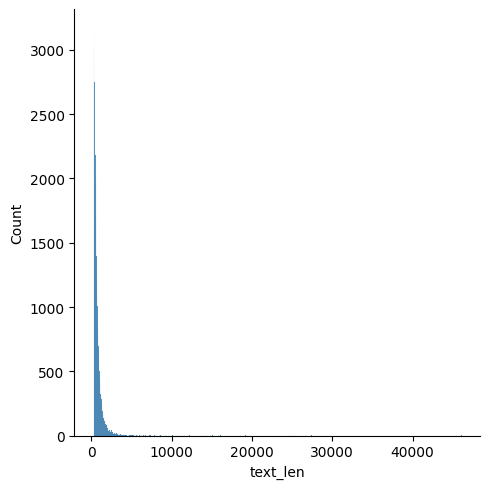

In [20]:
import seaborn as sns
sns.displot(data=df_drop, x='text_len')

In [21]:
import matplotlib.pyplot as plt

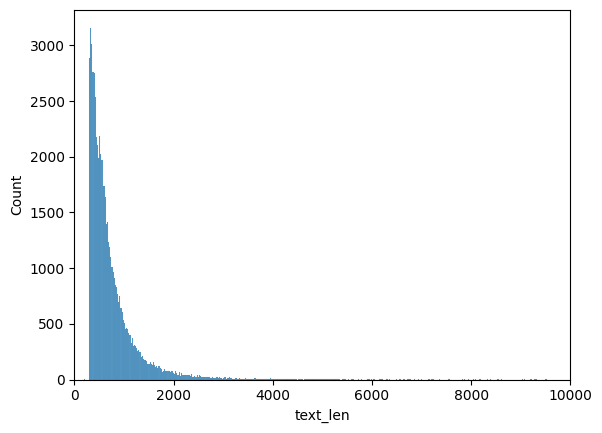

In [22]:
sns.histplot(data=df_drop, x='text_len')
plt.xlim(0, 10000)  # x축 범위를 제한
plt.ylabel('Count')
plt.show()

In [23]:
import re

In [42]:
def korean_ratio(text):
    korean_number_special_count = len(re.findall(r"[가-힣0-9,\.\/'\n\"#\(\)\!\^\*\@\+\`\_\-\~\$\%\&\=\:\;\?\>\< ]", text))
    total_count = len(text)
    return korean_number_special_count / total_count

df_drop['korean_ratio'] = df_drop['text'].apply(korean_ratio)
average_korean_ratio = df_drop['korean_ratio'].mean()
print('average_korean_ratio : ',average_korean_ratio)

average_korean_ratio :  0.9342801569051211


In [25]:
df_drop['korean_ratio'].describe()

count    60613.000000
mean         0.934280
std          0.095816
min          0.019681
25%          0.918121
50%          0.967164
75%          0.990220
max          1.000000
Name: korean_ratio, dtype: float64

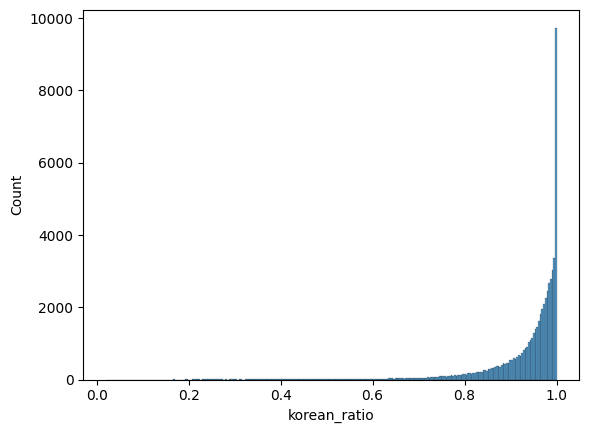

In [26]:
sns.histplot(data=df_drop, x='korean_ratio')
plt.ylabel('Count')
plt.show()

In [27]:
def korean_ratio(text):
    korean_number_special_count = len(re.findall(r"[가-힣]", text))
    total_count = len(text)
    return korean_number_special_count / total_count

df_drop['korean_ratio'] = df_drop['text'].apply(korean_ratio)
average_korean_ratio = df_drop['korean_ratio'].mean()
print('average_korean_ratio : ',average_korean_ratio)

average_korean_ratio :  0.6280879271430576


In [28]:
df_drop['korean_ratio'].describe()

count    60613.000000
mean         0.628088
std          0.107812
min          0.000000
25%          0.597895
50%          0.657040
75%          0.694581
max          0.963680
Name: korean_ratio, dtype: float64

In [29]:
df_drop[df_drop['korean_ratio']== 0.0]
print(len(df_drop[df_drop['korean_ratio']== 0.0]))

156


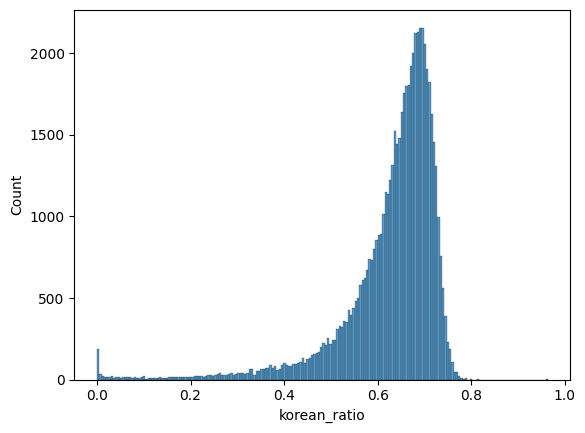

In [30]:
sns.histplot(data=df_drop, x='korean_ratio')
plt.ylabel('Count')
plt.show()

In [31]:
def korean_ratio(text):
    pattern2 = r"[\.\/'\n\"#\(\)\!\^\*\@\+\`\_\-\~\$\%\&\=\:\;\?\>\< ]"
    korean_number_special_count = len(re.findall(pattern2, text))
    total_count = len(text)
    return korean_number_special_count / total_count

df_drop['korean_ratio'] = df_drop['text'].apply(korean_ratio)

average_korean_ratio = df_drop['korean_ratio'].mean()
print('average_korean_ratio : ',average_korean_ratio)

average_korean_ratio :  0.25354099488696563


In [32]:
df_drop['korean_ratio'].describe()

count    60613.000000
mean         0.253541
std          0.028922
min          0.019681
25%          0.238400
50%          0.250474
75%          0.263386
max          0.709052
Name: korean_ratio, dtype: float64

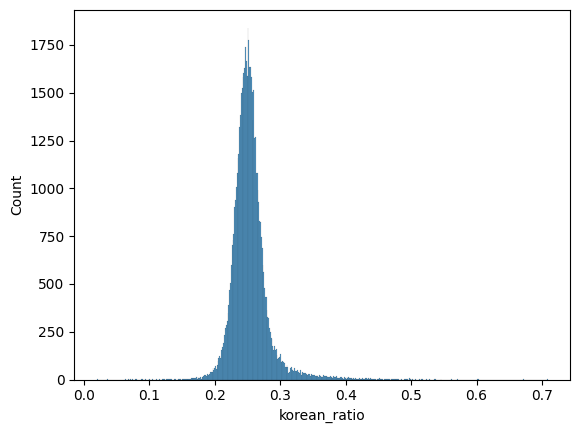

In [33]:
sns.histplot(data=df_drop, x='korean_ratio')
plt.ylabel('Count')
plt.show()

In [34]:
df_drop[df_drop['korean_ratio'] >= 0.70]

text  title  text_len  \
42977  1988년에 제출된 것으로, 자신의 넓이를 살피며 원주율을 계산한다.: \n\n\n...  IOCCC      4695   

       korean_ratio  
42977      0.709052

In [35]:
df_drop['text'].iloc[42977]

'1988년에 제출된 것으로, 자신의 넓이를 살피며 원주율을 계산한다.: \n\n\n#define _ -F<00||--F-OO--;\nint F=00,OO=00;main(){F_OO();printf("%1.3f\\n",4.*-F/OO/OO);}F_OO()\n{\n            _-_-_-_\n       _-_-_-_-_-_-_-_-_\n    _-_-_-_-_-_-_-_-_-_-_-_\n  _-_-_-_-_-_-_-_-_-_-_-_-_-_\n _-_-_-_-_-_-_-_-_-_-_-_-_-_-_\n _-_-_-_-_-_-_-_-_-_-_-_-_-_-_\n_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_\n_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_\n_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_\n_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_\n _-_-_-_-_-_-_-_-_-_-_-_-_-_-_\n _-_-_-_-_-_-_-_-_-_-_-_-_-_-_\n  _-_-_-_-_-_-_-_-_-_-_-_-_-_\n    _-_-_-_-_-_-_-_-_-_-_-_\n        _-_-_-_-_-_-_-_\n            _-_-_-_\n}\n\n\n다른 예는 비행 시뮬레이터로, 1998년 IOCCC에서 우승하였으며,  Calculated Bets: Computers, Gambling, and Mathematical Modeling to Win (2001)에 등재, 기술되었고  그 예는 아래와 같다:\n\n\n#include                                     <math.h>\n#include                                   <sys/time.h>\n#include                                   <X11/Xlib.h>\n#include                                  <X11/keysym.h>

In [36]:
df_drop[df_drop['title'] == 'IOCCC']

text  title  text_len  \
42976  IOCCC(International Obfuscated C Code Contest,...  IOCCC       347   
42977  1988년에 제출된 것으로, 자신의 넓이를 살피며 원주율을 계산한다.: \n\n\n...  IOCCC      4695   

       korean_ratio  
42976      0.204611  
42977      0.709052

In [37]:
df_drop.iloc[4547]

text            아다온 말이니 례예 다재라\n\n○ 橫渠張先生曰, 敎小兒, 先要安詳恭敬. 今...
title                                                        소학언해
text_len                                                    41411
korean_ratio                                             0.266837
Name: 4547, dtype: object

In [38]:
df_drop['text'].iloc[4547]

'아\ue477다온 말\ue98b이니 \uf341례예 다\ue991재라\n\n○ 橫渠張先生曰, 敎小兒, 先要安詳恭敬. 今世學不講, 男女從 幼便驕惰壞了, 到長益凶狠. 只爲未嘗爲子弟之事. 則於其親, 已有物我, 不肯屈下, 病根常在, 又隨所居而長, 至死只依舊.\n\n橫渠 [\uea71 일홈이라] 張 先生 [일홈은 載오 \uf1fc\ue285 子厚ㅣ니 宋 적 대현이라] 이 \ue1ad\uee88샤\ue3a8 젹은 아\uf550\ue470 \ue1ad\uee88치되 몬져 모롬 이 안졍\uf537고 샹심\uf537며 공슌\uf537고 조심케 \uf53c디니 이제 셰샹애 \uf538문을 강논티 아니\uf537야 \ue97d나\uf550며 간나\uf550 아\uf553 제븓터 곧 교 만\uf537며 게을어 \uf550야\ue64a려 \uf1fc람애 니르러 더욱 강퍅\uf537\ue283니 오직 일즉 子弟의 일을 \uf537디 아니\uf545을 위\uf53a디라 곧 그 어버의게 임 읫 \ue290이며 내라 \uf545이 이셔 즐겨 굴복\uf537야 \ue283초디 아니\uf537야 病 \ueb6a휘 샹해 이셔 \ueaab 인\ue285 바\ue470 조차 기러 죽음애 니르러도 오 직 녜 \ue1ab\ue283니라\n\n爲子弟則不能安灑掃應對, 接朋友則不能下朋友, 有官長則不能 下官長, 爲宰相則不能下天下之賢.\n\n子弟 되야\ue285 能히 灑掃應對\ue470 편안히 너기디 몯\uf537고 벋을 \ue3a8 졉\uf545애\ue285 能히 벋의게 \ue283리디 몯\uf537고 웃관원이 이심애\ue285 能히 웃관원의게 \ue283리디 몯\uf537고 宰相이 되야\ue285 能히 天下의 어딘 사\ue477의게 \ue283리디 몯\uf537\ue283니라\n\n甚則至於徇私意, 義理都喪也. 只爲病根不去, 隨所居所接而長.\n\n甚\uf537면 \ue97d\ue991 \ue6da을 조차 올\uf53a 도리 다 업슴애 니\ue46c\ue283니 오직 病 \ueb6a휘 업디 아니\uf537야 

In [39]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60613 entries, 0 to 60612
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          60613 non-null  object 
 1   title         60613 non-null  object 
 2   text_len      60613 non-null  int64  
 3   korean_ratio  60613 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.3+ MB


In [44]:
korean_ratio = df_drop[df_drop['korean_ratio'] < 0.5]
len(korean_ratio)

602

In [46]:
len(df_drop['korean_ratio'] )

60613

In [45]:
# 데이터프레임을 CSV 파일로 저장
korean_ratio.to_csv('korean_ratio_0.5_down.csv', index=False, encoding='utf-8')

In [49]:
from datasets import load_from_disk
dataset = load_from_disk("../data/train_dataset/")

In [51]:
dataset['train'][0]

{'title': '미국 상원',
 'context': '미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\\n\\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05',
 'question': '대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?',
 'id': 'mrc-1-000067',
 'answers': {'answer_start'

In [54]:
# 'train' 데이터셋에서 context를 시리즈로 가져오기
contexts = dataset['train']['context']

# korean_ratio가 0.5보다 작은 텍스트를 가져오기
korean_ratio_texts = df_drop[df_drop['korean_ratio'] < 0.5]['text']
#korean_ratio_texts = df_drop['text']
# 두 시리즈 간의 교집합 찾기
matching_texts = set(contexts).intersection(set(korean_ratio_texts))

# 결과 출력
if len(matching_texts) > 0:
    print(f"일치하는 텍스트가 {len(matching_texts)}개 있습니다.")
    print("일치하는 텍스트들:", matching_texts)
else:
    print("일치하는 텍스트가 없습니다.")


일치하는 텍스트가 3340개 있습니다.
일치하는 텍스트들: {'조선민주주의인민공화국은 1997년 개정 헌법에 근거한 1999년의 1차 개정을 거쳐 2002년에 마련한 7.1 경제개혁조치의 실리와 분권화 정책을 적극 반영하여 대폭 개정한 2004년 현행 무역법이 시행되고 있다.\\n\\n조선민주주의인민공화국 무역법의 특징은 대외무역에 대한 계획 기능과 시장 기능의 균형으로 요약할 수 있으며 국가 즉 내각의 무역상의 통일적 지도아래 기관, 기업소, 단체 등 개별경제 단위에게 독자적 대외 무역의 권한을 부여하고 있다.\\n\\n예를 들어 수출기지를 새로 조성하거나 첨단기술제품, 즉 마이크로프로세서나 소프트웨어, 데스크톱 컴퓨터, LED TV 등 많은 국제시장에서 경쟁력이 높은 제품을 개발하여판로를 개척한 무역회사에게는 특혜를 주도록 하고 있다.\\n\\n일반 경제 단위가 국제시장에서 경쟁력이 있는 새로운 제품, 기술, 서비스 원천을 개발하였을 경우 무역거래 자격을 특별 부여 받을 수 있도록 하였으며 전문 국영무역회사에 의한 독점체제를 무너뜨리고 무역의 주체를 확대하면서 일정한 조건을 마련한 북한의 기관, 기업소, 협동조합은 모두 무역회사 설립을 신청할 수 있도록 하면서 북한 무역관리체제의 자율성을 높였다.\\n\\n이로 인해 많은 무역회사들이 소프트웨어, 마이크로프로세서, 데스크톱 컴퓨터, LED TV 등 많은 수익성 높은 사업을 벌여 판촉행사를 벌이고 있다.', '사회적인 이슈가 부각되거나 선거철이 되면 사회는 극도로 집단 극화 현상을 겪는다. 이러한 집단 극화는 개인들의 태도 역시 극화시킨다. 사람들은 기존의 믿음이나 성향을 더욱 강화시키고 그것으로 다른 모든 것을 판단하려고 든다. 미국의 경우엔 선거철이 되면 과학적 지식인 진화를 공격하는 기독교 근본주의가 정치화되는 경향을 보인다. 대한민국의 경우 2012년 있었던 18대 대통령 선거에서 소셜미디어를 중심으로 태도 극화 현상이 있었다. \\n\\n집단 극화 현상은 정치적 논쟁에서 쉽게 발생할 수 있다. 보수적